In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], "size":18})
rc('text', usetex=True)

 # The $k \cdot p$ Method

The $k \cdot p$ method provides an effective method to describe the electronic band structure of crystals, especially near the band gaps where the energy dispersion is non-parabolic. The curious name comes from its use of the wave vector k (related to the momentum of a particle) and the momentum operator p.

The central idea of this method is to treat the wave vector $\vec{k}$ as a small perturbation around high symmetry points (like $\Gamma$, X, K points in the Brillouin Zone), and this is done via approximating the true Hamiltonian near a certain k-point by expanding it in terms of the basis functions (Bloch states). This results in a easier to solve Hamiltonian which can be solved more easily.


## The Hamiltonian

Starting from the Schrödinger equation, the Hamiltonian $H$ in a crystal is given by:

$$ H = -\frac{\hbar^2}{2m} \nabla^2 + V(\vec{r}) $$

Therefore, To construct the $k \cdot p$ Hamiltonian, we first write the Schrödinger equation for an electron in a periodic potential:

$$
\left[-\frac{\hbar^2}{2m}\nabla^2 + V(\mathbf{r})\right]\psi_{n\mathbf{k}}(\mathbf{r}) = E_{n\mathbf{k}}\psi_{n\mathbf{k}}(\mathbf{r}).
$$

### Derivation of $k \cdot p$ Hamiltonian

The starting point of $k\cdot p$ theory is the Bloch theorem, which states that the wavefunction of an electron in a periodic potential can be expressed as:

$$
\psi_{n\mathbf{k}}(\mathbf{r}) = e^{i\mathbf{k}\cdot\mathbf{r}}u_{n\mathbf{k}}(\mathbf{r})
$$

where $n$ is the band index, $\mathbf{k}$ is the wavevector, and $u_{n\mathbf{k}}(\mathbf{r})$ is a periodic function with the same periodicity as the crystal lattice. Thus, the potential can be written as:

$$
\hat{H} \psi_{n\mathbf{k}}(\mathbf{r}) = \left[ \frac{(\hat{\mathbf{p}} + \hbar\mathbf{k})^2}{2m} + V(\mathbf{r}) \right] \psi_{n\mathbf{k}}(\mathbf{r}) = E_{n\mathbf{k}}\psi_{n\mathbf{k}}(\mathbf{r})
$$

We can then expand the wavefunction $\psi_{n\mathbf{k}+\mathbf{q}}(\mathbf{r})$ at a nearby $\mathbf{k} + \mathbf{q}$ in terms of wavefunctions at $\mathbf{k}$:

$$
\psi_{n\mathbf{k}+\mathbf{q}}(\mathbf{r}) = \sum_{m} C_{m}(\mathbf{q}) \psi_{m\mathbf{k}}(\mathbf{r})
$$

where $m$ is the band index, and $C_{m}(\mathbf{q})$ are coefficients to be determined. Substituting this expansion into the Schrödinger equation and projecting onto $\psi_{n\mathbf{k}}(\mathbf{r})$, we obtain the following equation:

$$
\sum_{m} C_{m}(\mathbf{q}) \langle \psi_{n\mathbf{k}} | \hat{H} | \psi_{m\mathbf{k}} \rangle = E_{n\mathbf{k}+\mathbf{q}} \sum_{m} C_{m}(\mathbf{q}) \langle \psi_{n\mathbf{k}} | \psi_{m\mathbf{k}} \rangle
$$

The matrix elements of the Hamiltonian can be approximated as follows:

$$
\langle \psi_{n\mathbf{k}} | \hat{H} | \psi_{m\mathbf{k}} \rangle \approx \delta_{mn}E_{n\mathbf{k}} + \frac{1}{2} \left( \frac{\partial^2 E_{n\mathbf{k}}}{\partial k_i \partial k_j} \right) q_i q_j + \mathcal{O}(q^3)
$$

The diagonal terms $E_{n\mathbf{k}}$ are the band energies at $\mathbf{k}$, and the off-diagonal terms represent the coupling between different bands due to the $\mathbf{k}\cdot\mathbf{p}$ term in the Hamiltonian. This leads to the effective mass approximation, where the energy-momentum relation near a band extrema is parabolic:

$$
E_{n\mathbf{k}+\mathbf{q}} \approx E_{n\mathbf{k}} + \frac{\hbar^2 q^2}{2m^*}
$$

where $m^*$ is the effective mass of the electron, which is generally different from the free electron mass.

### $k\cdot p$ theory for Semiconductors
In the case of semiconductors, the $k\cdot p$ theory is commonly used to describe the electronic properties near the band edges. For instance, in the vicinity of the $k = 0$ point (the $\Gamma$ point), the conduction band minimum and valence band maximum are typically separated by the fundamental band gap $E_g$.

We can write the $k\cdot p$ Hamiltonian as a $2\times2$ matrix:

$$
H_{k\cdot p} = \left[ \begin{array}{cc} E_c + \frac{\hbar^2 k^2}{2m_c'} & P k \\ P k & E_v - \frac{\hbar^2 k^2}{2m_v'}\end{array} \right]
$$

where $E_c$ and $E_v$ are the conduction and valence band edge energies respectively, $m_c'$ and $m_v'$ are the conduction and valence band effective masses respectively, and $P$ is the interband matrix element of the momentum operator. The eigenvalues of this Hamiltonian give the energy-momentum relation for the electrons and holes near the band edge:

$$
E_{\pm} = \frac{E_c + E_v}{2} \pm \sqrt{\left( \frac{E_c - E_v}{2} \right)^2 + P^2 k^2}
$$

Now, if we take the case where we have a system constituted of 2 bands located at $E_g/2$ (mid gap in the zero-energy point) this would mean that $E_c = -E_v = E_g$. This would mean that the energy-momentum relation would be:

$$
E_{\pm} = \frac{\hbar^2 k^2}{2m_c'} \pm \sqrt{(E_g/2)^2 + \hbar^2 P^2 k^2/m_c'^2}
$$

You can ctually note this is an actual parabola:

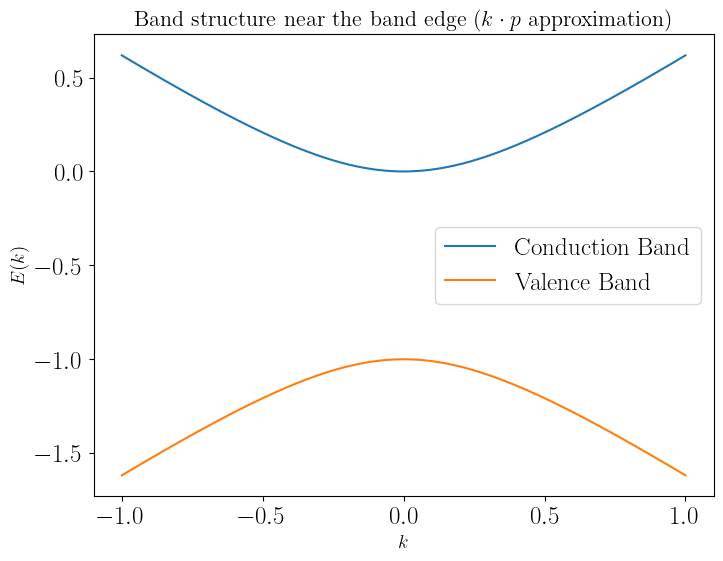

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
E_c = 0    # Conduction band edge energy
E_v = -1   # Valence band edge energy
m_c = 1    # Conduction band effective mass
m_v = 1    # Valence band effective mass
P = 1      # Interband matrix element of the momentum operator
hbar = 1   # Reduced Planck constant (set to 1 for simplicity)

# Define k values
k = np.linspace(-1, 1, 1000)

# Define the Hamiltonian and compute the eigenvalues
E_plus = (E_c + E_v)/2 + np.sqrt(((E_c - E_v)/2)**2 + P**2 * k**2)
E_minus = (E_c + E_v)/2 - np.sqrt(((E_c - E_v)/2)**2 + P**2 * k**2)

# Create the plot
plt.figure(figsize=(8,6))
plt.plot(k, E_plus, label='Conduction Band')
plt.plot(k, E_minus, label='Valence Band')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('$E(k)$', fontsize=14)
plt.title('Band structure near the band edge ($k\cdot p$ approximation)', fontsize=16)
plt.legend()
plt.show()


### A quick toy numerical example

We will use a 1D lattice and a periodic potential. We then construct the $k \cdot p$ Hamiltonian and calculate the energy eigenvalues for a periodic potential. We repeat this calculation for different reference wavevectors and compare the results. The idea is to inspect how the energy eigenvalues change as the reference wavevector is varied, demonstrating the convergence of the $k \cdot p$ method.

k0 = 0.0
k0 = 0.3490658503988659
k0 = 0.6981317007977318
k0 = 1.0471975511965976
k0 = 1.3962634015954636
k0 = 1.7453292519943295
k0 = 2.0943951023931953
k0 = 2.443460952792061
k0 = 2.792526803190927
k0 = 3.141592653589793


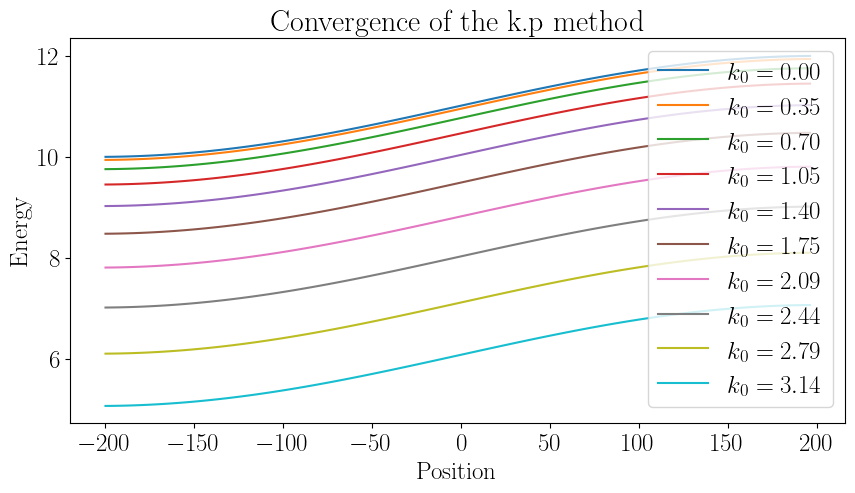

In [30]:
N = 100  # number of points in the lattice
L = 200.0  # length of the lattice
x = np.linspace(-L, L, N, endpoint=False)  # lattice points
a = L / N  # lattice constant

V0 = 10.0  # strength of the potential
V = V0 * np.cos(2 * np.pi * x / a)  # periodic potential

# Set up the k.p Hamiltonian
m = 1.0  # mass of the particle
hbar = 1.0  # Planck's constant
k0 = 0.0  # reference wavevector
H0 = np.diag(-hbar**2 / (2 * m) * np.ones(N-1), -1) + np.diag(2 * hbar**2 / (2 * m) * np.ones(N)) + np.diag(-hbar**2 / (2 * m) * np.ones(N-1), 1)
H1 = np.diag(V)
H = H0 + H1

# Calculate the eigenvalues
E = np.linalg.eigvalsh(H)

# Repeat the calculation for different reference wavevectors and compare
k_values = np.linspace(0, 2 * np.pi / a, 10)
E_values = []
for k0 in k_values:
    H0 = np.diag(-hbar**2 / (2 * m) * np.ones(N-1), -1) + np.diag(2 * hbar**2 / (2 * m) * np.ones(N) - hbar**2 * k0**2 / (2 * m)) + np.diag(-hbar**2 / (2 * m) * np.ones(N-1), 1)
    H = H0 + H1
    E_values.append(np.linalg.eigvalsh(H))

fig, ax = plt.subplots(figsize=(10,5))
# Plot the results
for k0, E in zip(k_values, E_values):
    print(f"k0 = {k0}")
    ax.plot(x, E, label = f"$k_0 = {k0:.2f}$")
ax.set_xlabel('Position')
ax.set_ylabel('Energy')
ax.set_title('Convergence of the k.p method')
ax.legend()

## Conclusion

The $k\cdot p$ theory provides a powerful tool to describe the band structure near the band edges. It can be extended to multi-band systems and to include effects such as spin-orbit coupling. However, it is based on a perturbative expansion around a certain $\mathbf{k}$ point and thus may not accurately describe the band structure far from this point. For a complete description of the band structure, other methods such as tight-binding or ab-initio calculations might be necessary.

### References

1. [Coursera - Approximation Methods](https://www.coursera.org/lecture/approximation-methods/k-dot-p-method-2LwbL)
2. [Badihassaf](https://badihassaf.files.wordpress.com/2018/10/lecture-15.pdf)
3. [UFL](http://www.phys.ufl.edu/~avinash/Notes/kp_bandstructure/kp_bandstructure.pdf)